In [34]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import geodatasets

from geodatasets import get_path
path_to_file = get_path('nybb')

### Data Collection

In [4]:
violation19 = pd.read_csv("data/Housing_Maintenance_Code_Violations_2019.csv")
violation21 = pd.read_csv("data/Housing_Maintenance_Code_Violations_2021.csv")
violation24 = pd.read_csv("data/Housing_Maintenance_Code_Violations_2024.csv")

In [16]:
violation19.head()

,ViolationID,BuildingID,BoroID,Borough,Block,Lot,Class,ApprovedDate,OriginalCorrectByDate,NewCorrectByDate,CurrentStatusID,CurrentStatus,ViolationStatus,RentImpairing,NOVDescription
0,12833362,49163,2,BRONX,3103,26,A,01/02/2019,04/08/2019,NaN,9,VIOLATION DISMISSED,Close,N,§ 27-2005 ADM CODE REPAIR THE BROKEN OR DEFECT...
1,12832253,115647,2,BRONX,2846,74,A,01/02/2019,04/08/2019,NaN,19,VIOLATION CLOSED,Close,N,§ 27-2005 ADM CODE PAINT METAL IN ACCORDANCE W...
2,12833436,304527,3,BROOKLYN,1615,73,B,01/02/2019,02/07/2019,NaN,22,FIRST NO ACCESS TO RE- INSPECT VIOLATION,Open,N,§ 27-2018 ADMIN. CODE: ABATE THE NUISANCE CONS...
3,12832401,94487,2,BRONX,2952,53,B,01/02/2019,02/07/2019,NaN,19,VIOLATION CLOSED,Close,N,§ 27-2005 ADM CODE REPAIR THE BROKEN OR DEFECT...
4,12831837,119895,2,BRONX,3057,11,B,01/02/2019,02/07/2019,NaN,21,NOT COMPLIED WITH,Open,N,§ 27-2005 ADM CODE PROPERLY REPAIR THE BROKEN ...


In [18]:
violation21.head()

,ViolationID,BuildingID,BoroID,Borough,Block,Lot,Class,ApprovedDate,OriginalCorrectByDate,NewCorrectByDate,CurrentStatusID,CurrentStatus,ViolationStatus,RentImpairing,NOVDescription
0,13967451,294910,3,BROOKLYN,5230,76,B,01/02/2021,02/08/2021,NaN,22,FIRST NO ACCESS TO RE- INSPECT VIOLATION,Open,N,§ 27-2017.3 HMC: TRACE AND REPAIR THE SOURCE A...
1,13894931,10065,1,MANHATTAN,2241,2,C,01/02/2021,01/10/2021,NaN,19,VIOLATION CLOSED,Close,N,§ 27-2005 ADM CODE & 309 M/D LAW ABATE THE NUI...
2,13894980,4175,1,MANHATTAN,2046,7,C,01/02/2021,01/30/2021,NaN,19,VIOLATION CLOSED,Close,N,"§ 27-2005, 27-2007, 27-2041.1 HMC: REPLACE OR ..."
3,13965393,68459,2,BRONX,4700,28,C,01/02/2021,01/30/2021,NaN,47,NOTICE OF ISSUANCE SENT TO TENANT,Open,N,HMC ADM CODE: § 27-2017.4 ABATE THE INFESTATIO...
4,13965388,348145,3,BROOKLYN,5329,62,A,01/02/2021,04/09/2021,NaN,19,VIOLATION CLOSED,Close,N,§ 27-2013 ADM CODE PAINT WITH LIGHT COLORED PA...


In [20]:
violation24.head()

,ViolationID,BuildingID,BoroID,Borough,Block,Lot,Class,ApprovedDate,OriginalCorrectByDate,NewCorrectByDate,CurrentStatusID,CurrentStatus,ViolationStatus,RentImpairing,NOVDescription
0,16566210,39531,1,MANHATTAN,1966,42,B,01/02/2024,02/07/2024,NaN,19,VIOLATION CLOSED,Close,Y,§ 27-2005 ADM CODE REPAIR THE ROOF SO THAT IT ...
1,16555062,64683,2,BRONX,2432,47,B,01/02/2024,02/07/2024,NaN,19,VIOLATION CLOSED,Close,N,§ 27-2005 HMC: PROPERLY REPAIR OR REPLACE THE ...
2,16566751,81924,2,BRONX,3310,40,A,01/02/2024,04/07/2024,NaN,9,VIOLATION DISMISSED,Close,N,§ 27-2013 ADM CODE PAINT WITH LIGHT COLORED PA...
3,16558287,228366,3,BROOKLYN,1296,14,A,01/02/2024,04/07/2024,NaN,9,VIOLATION DISMISSED,Close,N,§ 27-2005 ADM CODE REPAIR THE BROKEN OR DEFECT...
4,16560902,295908,3,BROOKLYN,1217,9,C,01/02/2024,01/03/2024,NaN,19,VIOLATION CLOSED,Close,N,"§ 27-2028, 2032 ADM CODE PROVIDE AN ADEQUATE S..."


### Popping NewCorrectByDate on all Dataframes due to significant number of NaN's

In [116]:
#violation19.pop('NewCorrectByDate')
#violation21.pop('NewCorrectByDate')
#violation24.pop('NewCorrectByDate')

In [113]:
violation19.head()

,ViolationID,BuildingID,BoroID,Borough,Block,Lot,Class,ApprovedDate,OriginalCorrectByDate,CurrentStatusID,CurrentStatus,ViolationStatus,RentImpairing,NOVDescription
0,12833362,49163,2,BRONX,3103,26,A,01/02/2019,04/08/2019,9,VIOLATION DISMISSED,Close,N,§ 27-2005 ADM CODE REPAIR THE BROKEN OR DEFECT...
1,12832253,115647,2,BRONX,2846,74,A,01/02/2019,04/08/2019,19,VIOLATION CLOSED,Close,N,§ 27-2005 ADM CODE PAINT METAL IN ACCORDANCE W...
2,12833436,304527,3,BROOKLYN,1615,73,B,01/02/2019,02/07/2019,22,FIRST NO ACCESS TO RE- INSPECT VIOLATION,Open,N,§ 27-2018 ADMIN. CODE: ABATE THE NUISANCE CONS...
3,12832401,94487,2,BRONX,2952,53,B,01/02/2019,02/07/2019,19,VIOLATION CLOSED,Close,N,§ 27-2005 ADM CODE REPAIR THE BROKEN OR DEFECT...
4,12831837,119895,2,BRONX,3057,11,B,01/02/2019,02/07/2019,21,NOT COMPLIED WITH,Open,N,§ 27-2005 ADM CODE PROPERLY REPAIR THE BROKEN ...


In [114]:
violation21.head()

,ViolationID,BuildingID,BoroID,Borough,Block,Lot,Class,ApprovedDate,OriginalCorrectByDate,CurrentStatusID,CurrentStatus,ViolationStatus,RentImpairing,NOVDescription
0,13967451,294910,3,BROOKLYN,5230,76,B,01/02/2021,02/08/2021,22,FIRST NO ACCESS TO RE- INSPECT VIOLATION,Open,N,§ 27-2017.3 HMC: TRACE AND REPAIR THE SOURCE A...
1,13894931,10065,1,MANHATTAN,2241,2,C,01/02/2021,01/10/2021,19,VIOLATION CLOSED,Close,N,§ 27-2005 ADM CODE & 309 M/D LAW ABATE THE NUI...
2,13894980,4175,1,MANHATTAN,2046,7,C,01/02/2021,01/30/2021,19,VIOLATION CLOSED,Close,N,"§ 27-2005, 27-2007, 27-2041.1 HMC: REPLACE OR ..."
3,13965393,68459,2,BRONX,4700,28,C,01/02/2021,01/30/2021,47,NOTICE OF ISSUANCE SENT TO TENANT,Open,N,HMC ADM CODE: § 27-2017.4 ABATE THE INFESTATIO...
4,13965388,348145,3,BROOKLYN,5329,62,A,01/02/2021,04/09/2021,19,VIOLATION CLOSED,Close,N,§ 27-2013 ADM CODE PAINT WITH LIGHT COLORED PA...


In [115]:
violation24.head()

,ViolationID,BuildingID,BoroID,Borough,Block,Lot,Class,ApprovedDate,OriginalCorrectByDate,CurrentStatusID,CurrentStatus,ViolationStatus,RentImpairing,NOVDescription
0,16566210,39531,1,MANHATTAN,1966,42,B,01/02/2024,02/07/2024,19,VIOLATION CLOSED,Close,Y,§ 27-2005 ADM CODE REPAIR THE ROOF SO THAT IT ...
1,16555062,64683,2,BRONX,2432,47,B,01/02/2024,02/07/2024,19,VIOLATION CLOSED,Close,N,§ 27-2005 HMC: PROPERLY REPAIR OR REPLACE THE ...
2,16566751,81924,2,BRONX,3310,40,A,01/02/2024,04/07/2024,9,VIOLATION DISMISSED,Close,N,§ 27-2013 ADM CODE PAINT WITH LIGHT COLORED PA...
3,16558287,228366,3,BROOKLYN,1296,14,A,01/02/2024,04/07/2024,9,VIOLATION DISMISSED,Close,N,§ 27-2005 ADM CODE REPAIR THE BROKEN OR DEFECT...
4,16560902,295908,3,BROOKLYN,1217,9,C,01/02/2024,01/03/2024,19,VIOLATION CLOSED,Close,N,"§ 27-2028, 2032 ADM CODE PROVIDE AN ADEQUATE S..."


# Univariate Map

### Place Borough Column into a dataframe

In [8]:
df = pd.read_csv('data/Housing_Maintenance_Code_Violations_2019.csv', usecols=['Borough'])

##### Clean it up

In [22]:
df = df[df['Borough'].notna()]
counts = df['Borough'].value_counts().reset_index()
counts.columns = ['Borough', 'Violations']

In [23]:
df.head()

,Borough
0,BRONX
1,BRONX
2,BROOKLYN
3,BRONX
4,BRONX


In [24]:
counts.head()

,Borough,Violations
0,BROOKLYN,263624
1,BRONX,193456
2,MANHATTAN,133529
3,QUEENS,67761
4,STATEN ISLAND,10167


In [51]:
mapping = {
    'MANHATTAN': 'Manhattan',
    'BROOKLYN': 'Brooklyn',
    'BRONX': 'Bronx',
    'QUEENS': 'Queens',
    'STATEN ISLAND': 'Staten Island'
}
counts['BoroName'] = counts['Borough'].map(mapping)

### Load in NYC Boundaries

In [52]:
nybb_path = get_path('nybb')
boroughs = gpd.read_file(nybb_path)[['BoroName', 'geometry']]

In [53]:
boroughs

,BoroName,geometry
0,Staten Island,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,Queens,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,Brooklyn,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,Manhattan,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,Bronx,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


#### Merge Geometry and Dataframe

In [54]:
print(counts.columns.tolist())

['Borough', 'Violations', 'BoroName']


In [57]:
merged = boroughs.merge(
    counts[['BoroName', 'Violations']],
    on='BoroName',
    how='left'
)

In [58]:
merged

,BoroName,geometry,Violations
0,Staten Island,"MULTIPOLYGON (((970217.022 145643.332, 970227....",10167
1,Queens,"MULTIPOLYGON (((1029606.077 156073.814, 102957...",67761
2,Brooklyn,"MULTIPOLYGON (((1021176.479 151374.797, 102100...",263624
3,Manhattan,"MULTIPOLYGON (((981219.056 188655.316, 980940....",133529
4,Bronx,"MULTIPOLYGON (((1012821.806 229228.265, 101278...",193456


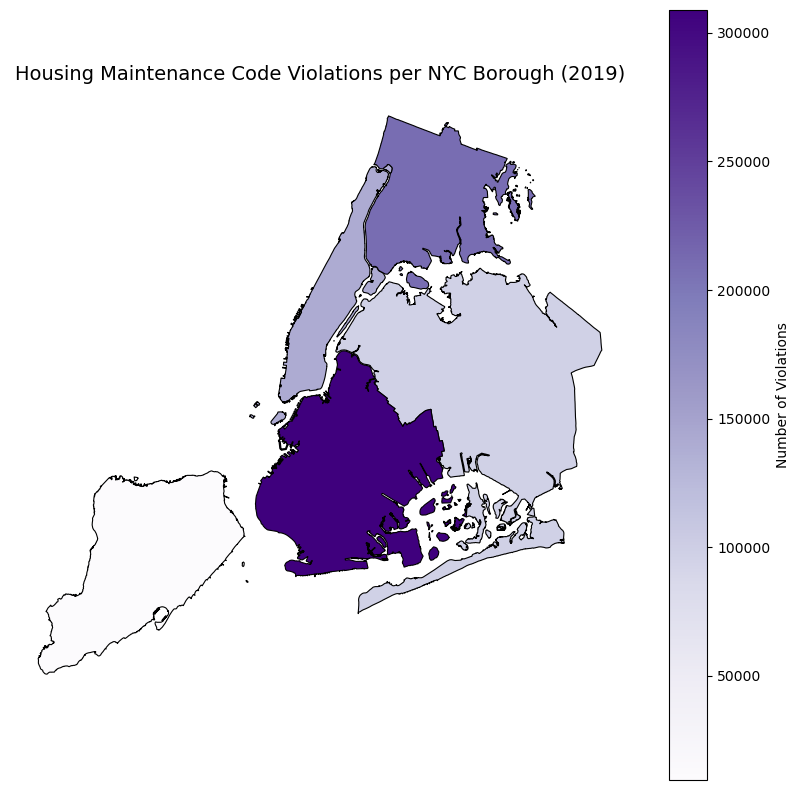

In [105]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged.plot(
    column='Violations',
    cmap='Purples',
    linewidth=0.8,
    edgecolor='black',
    legend=True,
    legend_kwds={'label': "Number of Violations"},
    ax=ax
)
ax.set_title('Housing Maintenance Code Violations per NYC Borough (2019)', fontsize=14)
ax.axis('off')

plt.savefig("visualizations/violations_borough_2019")

### Now print the other years

##### 2021

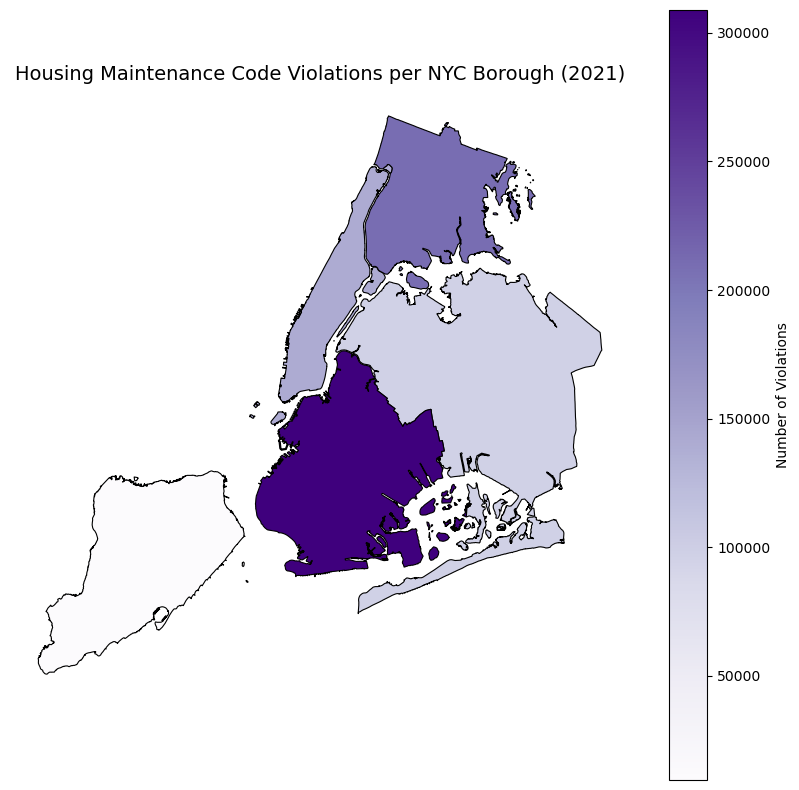

In [123]:
df = pd.read_csv('data/Housing_Maintenance_Code_Violations_2021.csv', usecols=['Borough'])

df = df[df['Borough'].notna()]
counts = df['Borough'].value_counts().reset_index()
counts.columns = ['Borough', 'Violations']

mapping = {
    'MANHATTAN': 'Manhattan',
    'BROOKLYN': 'Brooklyn',
    'BRONX': 'Bronx',
    'QUEENS': 'Queens',
    'STATEN ISLAND': 'Staten Island'
}
counts['BoroName'] = counts['Borough'].map(mapping)

merged = boroughs.merge(
    counts[['BoroName', 'Violations']],
    on='BoroName',
    how='left'
)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged.plot(
    column='Violations',
    cmap='Purples',
    linewidth=0.8,
    edgecolor='black',
    legend=True,
    legend_kwds={'label': "Number of Violations"},
    ax=ax
)
ax.set_title('Housing Maintenance Code Violations per NYC Borough (2021)', fontsize=14)
ax.axis('off')

plt.savefig("visualizations/violations_borough_2021")

In [124]:
merged

,BoroName,geometry,Violations
0,Staten Island,"MULTIPOLYGON (((970217.022 145643.332, 970227....",9575
1,Queens,"MULTIPOLYGON (((1029606.077 156073.814, 102957...",97103
2,Brooklyn,"MULTIPOLYGON (((1021176.479 151374.797, 102100...",308831
3,Manhattan,"MULTIPOLYGON (((981219.056 188655.316, 980940....",141208
4,Bronx,"MULTIPOLYGON (((1012821.806 229228.265, 101278...",210255


##### 2024

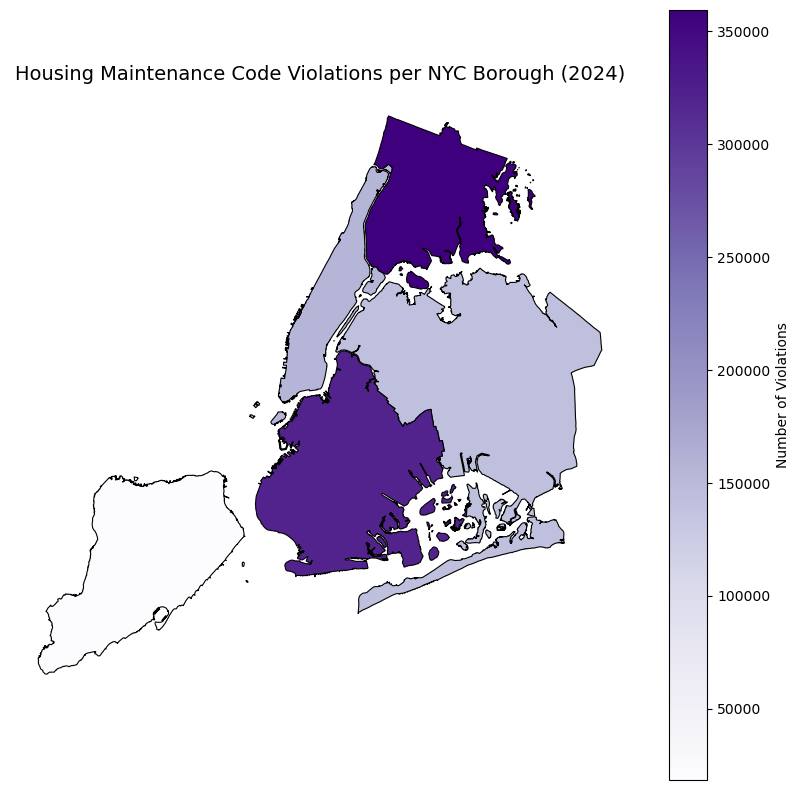

In [121]:
df = pd.read_csv('data/Housing_Maintenance_Code_Violations_2024.csv', usecols=['Borough'])

df = df[df['Borough'].notna()]
counts = df['Borough'].value_counts().reset_index()
counts.columns = ['Borough', 'Violations']

mapping = {
    'MANHATTAN': 'Manhattan',
    'BROOKLYN': 'Brooklyn',
    'BRONX': 'Bronx',
    'QUEENS': 'Queens',
    'STATEN ISLAND': 'Staten Island'
}
counts['BoroName'] = counts['Borough'].map(mapping)

merged = boroughs.merge(
    counts[['BoroName', 'Violations']],
    on='BoroName',
    how='left'
)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged.plot(
    column='Violations',
    cmap='Purples',
    linewidth=0.8,
    edgecolor='black',
    legend=True,
    legend_kwds={'label': "Number of Violations"},
    ax=ax
)
ax.set_title('Housing Maintenance Code Violations per NYC Borough (2024)', fontsize=14)
ax.axis('off')
plt.savefig("visualizations/violations_borough_2024")

In [122]:
merged

,BoroName,geometry,Violations
0,Staten Island,"MULTIPOLYGON (((970217.022 145643.332, 970227....",18514
1,Queens,"MULTIPOLYGON (((1029606.077 156073.814, 102957...",142190
2,Brooklyn,"MULTIPOLYGON (((1021176.479 151374.797, 102100...",319742
3,Manhattan,"MULTIPOLYGON (((981219.056 188655.316, 980940....",156669
4,Bronx,"MULTIPOLYGON (((1012821.806 229228.265, 101278...",359466


### May be too broad to get any information, potentially explore % change in 2019 to 2024

In [67]:
df19 = pd.read_csv('data/Housing_Maintenance_Code_Violations_2019.csv', usecols=['Borough'])
df19 = df19[df19['Borough'].notna()]
counts19 = df19['Borough'].value_counts().reset_index()
counts19.columns = ['Borough', 'Violations']

In [72]:
counts19

,Borough,Violations
0,BROOKLYN,263624
1,BRONX,193456
2,MANHATTAN,133529
3,QUEENS,67761
4,STATEN ISLAND,10167


In [70]:
df24 = pd.read_csv('data/Housing_Maintenance_Code_Violations_2024.csv', usecols=['Borough'])
df24 = df24[df24['Borough'].notna()]
counts24 = df24['Borough'].value_counts().reset_index()
counts24.columns = ['Borough', 'Violations']

In [73]:
counts24

,Borough,Violations
0,BRONX,359466
1,BROOKLYN,319742
2,MANHATTAN,156669
3,QUEENS,142190
4,STATEN ISLAND,18514


In [74]:
mapping = {
    'MANHATTAN': 'Manhattan',
    'BROOKLYN': 'Brooklyn',
    'BRONX': 'Bronx',
    'QUEENS': 'Queens',
    'STATEN ISLAND': 'Staten Island'
}
counts19['BoroName'] = counts19['Borough'].map(mapping)

counts24['BoroName'] = counts24['Borough'].map(mapping)

In [78]:
dfPct = counts19.merge(
    counts24[['BoroName', 'Violations']],
    on='BoroName',
    suffixes=('_2019', '_2024'),
    how='inner'
)

dfPct['pct_change'] = (
    100 *
    (dfPct['Violations_2024'] - dfPct['Violations_2019']) /
    dfPct['Violations_2019']
)

In [99]:
mergedPct = boroughs.merge(
    dfPct[['BoroName', 'pct_change']],
    on='BoroName',
    how='left'
)

In [100]:
mergedPct

,BoroName,geometry,pct_change
0,Staten Island,"MULTIPOLYGON (((970217.022 145643.332, 970227....",82.098948
1,Queens,"MULTIPOLYGON (((1029606.077 156073.814, 102957...",109.840469
2,Brooklyn,"MULTIPOLYGON (((1021176.479 151374.797, 102100...",21.287136
3,Manhattan,"MULTIPOLYGON (((981219.056 188655.316, 980940....",17.329569
4,Bronx,"MULTIPOLYGON (((1012821.806 229228.265, 101278...",85.812795


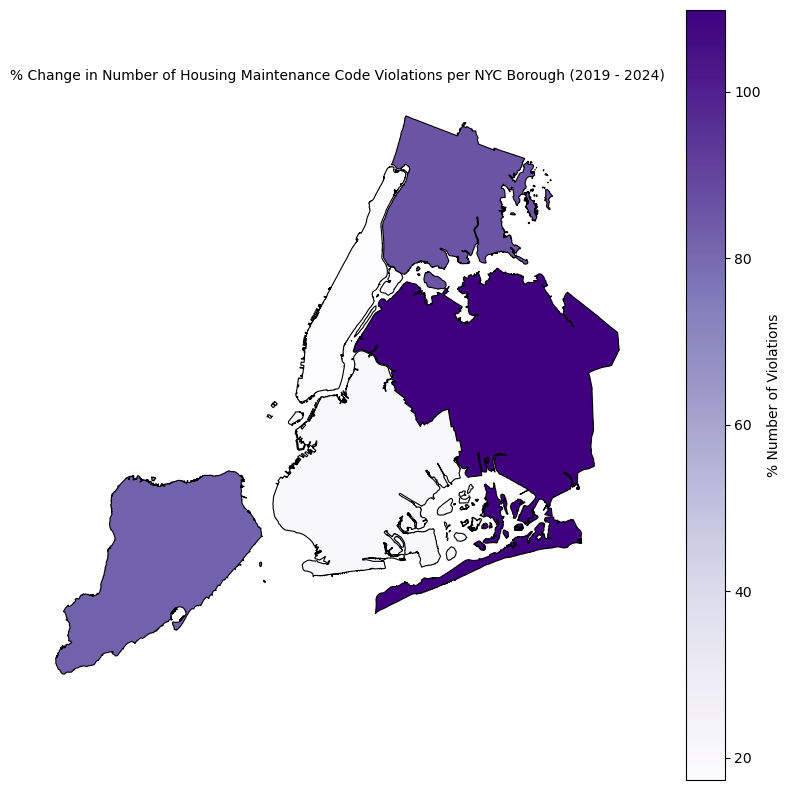

In [117]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
mergedPct.plot(
    column='pct_change',
    cmap='Purples',
    linewidth=0.8,
    edgecolor='black',
    legend=True,
    legend_kwds={'label': "% Number of Violations"},
    ax=ax
)
ax.set_title('% Change in Number of Housing Maintenance Code Violations per NYC Borough (2019 - 2024)', fontsize=10)
ax.axis('off')
plt.savefig("visualizations/violations_percentchng_borough_2019_2024")

# Bar Graph